## A stock ticker - with intraday pricing

This is simple Plotly visualization to look at different time horizons of movements of a ticker - whether a Stock or an overall index

This notebook is taken from a Towards Data Science Post from Saji Lhessani
https://towardsdatascience.com/python-how-to-get-live-market-data-less-than-0-1-second-lag-c85ee280ed93


In [14]:
import numpy as np
import pandas as pd
import yfinance as yf
import plotly.graph_objs as go

Lets pick a ticker and set a time period and time interval

 - valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
 - valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo 


In [20]:
data = yf.download(tickers='^GSPC', period='1d', interval='1m')

[*********************100%***********************]  1 of 1 completed


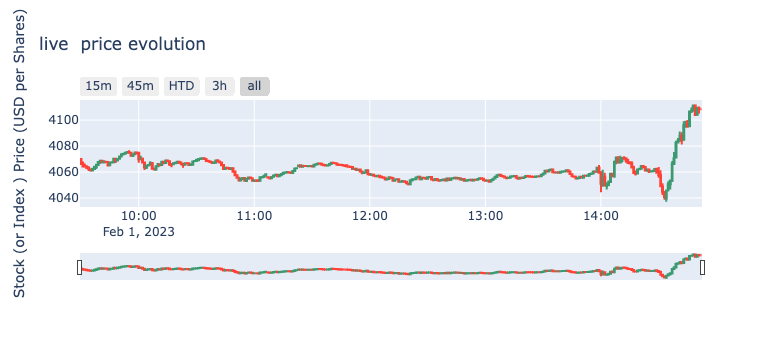

In [21]:

#declare figure
fig = go.Figure()

#Candlestick
fig.add_trace(go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'], name = 'market data'))

# Add titles
fig.update_layout(
    title=' live  price evolution',
    yaxis_title='Stock (or Index ) Price (USD per Shares)')

# X-Axes
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=15, label="15m", step="minute", stepmode="backward"),
            dict(count=45, label="45m", step="minute", stepmode="backward"),
            dict(count=1, label="HTD", step="hour", stepmode="todate"),
            dict(count=3, label="3h", step="hour", stepmode="backward"),
            dict(step="all")
        ])
    )
)

#Show
fig.show()